## **Imports**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import collections
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from IPython.core.interactiveshell import InteractiveShell
import warnings

%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

In [4]:
xls = pd.ExcelFile('Healthcare_dataset.xlsx')
df= pd.read_excel(xls, 'Dataset')

# **Data Understanding**

In [5]:
df.head()

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket Gluco_Record_Prior_Ntm Gluco_Record_During_Rx  \
0  OB/GYN/Others/PCP/Unknown                      N                      N   
1  OB/GYN/Others/PCP/Unknown                      N                      N   
2  OB/GYN/Others/PCP/Unknown                      N                      N   
3  OB/GYN/Others/PCP/Unknown                      N                      Y   
4  OB/GYN/Others/PCP/Unknown                      Y                      Y   

   Dexa_Freq_During_Rx Dexa_During_Rx Frag_Frac_Prior_Ntm Frag_Frac_During_Rx  \
0                    0              N                   N                   N   
1                    0              N                   N                   N   
2                    0              N                   N                   N   
3                    0              N                   N                   N   
4                    0              N                   N                   N   

  Risk_Segment_Prior_Ntm Tscore_Bucket_Prior_Ntm Risk_Segment_During_Rx  \
0                 VLR_LR                   >-2.5                 VLR_LR   
1                 VLR_LR                   >-2.5                Unknown   
2                 HR_VHR                  <=-2.5                 HR_VHR   
3                 HR_VHR                   >-2.5                 HR_VHR   
4                 HR_VHR                  <=-2.5                Unknown   

  Tscore_Bucket_During_Rx Change_T_Score Change_Risk_Segment Adherent_Flag  \
0                  <=-2.5      No change             Unknown      Adherent   
1                 Unknown        Unknown             Unknown      Adherent   
2                  <=-2.5      No change           No change      Adherent   
3                  <=-2.5      No change           No change      Adherent   
4                 Unknown        Unknown             Unknown      Adherent   

  Idn_Indicator Injectable_Experience_During_Rx  \
0             N                               Y   
1             N                               Y   
2             N                               Y   
3             N                               Y   
4             N                               Y   

  Comorb_Encounter_For_Screening_For_Malignant_Neoplasms  \
0                                                      N   
1                                                      N   
2                                                      Y   
3                                                      N   
4                                                      Y   

  Comorb_Encounter_For_Immunization  \
0                                 Y   
1                                 N   
2                                 N   
3                                 Y   
4                                 Y   

  Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx  \
0                                                               Y   
1                                                               Y   
2                                                               Y   
3                                                               Y   
4                                                               Y   

  Comorb_Vitamin_D_D

In [6]:
df.shape

(3424, 69)

In [7]:
df.dtypes

Ptid                                                                  object
Persistency_Flag                                                      object
Gender                                                                object
Race                                                                  object
Ethnicity                                                             object
Region                                                                object
Age_Bucket                                                            object
Ntm_Speciality                                                        object
Ntm_Specialist_Flag                                                   object
Ntm_Speciality_Bucket                                                 object
Gluco_Record_Prior_Ntm                                                object
Gluco_Record_During_Rx                                                object
Dexa_Freq_During_Rx                                                    int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [9]:
df.columns=[x.lower() for x in df.columns]

### **Analyzing dependency of variable (Before Transformation)**

In [10]:
classes=df['persistency_flag'].value_counts()
normal_share=round(classes[0]/df['persistency_flag'].count()*100,2)
fraud_share=round(classes[1]/df['persistency_flag'].count()*100, 2)
print("Non-Persistent : {} %".format(normal_share))
print("Persistent : {} %".format(fraud_share))

Non-Persistent : 62.35 %
Persistent : 37.65 %


In [11]:
cat_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)[['persistency_flag']]
np.abs(cat_corr).sort_values(by=['persistency_flag'], ascending=False)

persistency_flag
persistency_flag                                                            1.000000
dexa_during_rx                                                              0.491823
dexa_freq_during_rx                                                         0.395247
comorb_long_term_current_drug_therapy                                       0.352760
comorb_encounter_for_screening_for_malignant_neoplasms                      0.322320
comorb_encounter_for_immunization                                           0.314887
comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx             0.289828
comorb_other_disorders_of_bone_density_and_structure                        0.247283
concom_systemic_corticosteroids_plain                                       0.242854
comorb_other_joint_disorder_not_elsewhere_classified                        0.233279
concom_anaesthetics_general                                                 0.222293
concom_viral_vaccines                                                       0.222241
concom_macrolides_and_similar_types                                         0.221611
concom_cephalosporins                                                       0.221543
comorb_gastro_esophageal_reflux_disease                                     0.220644
comorb_personal_history_of_other_diseases_and_conditions                    0.219665
comorb_dorsalgia                                                            0.215307
comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx          0.213413
gluco_record_during_rx                                                      0.212704
concom_broad_spectrum_penicillins                                           0.197854
concom_narcotics                                                            0.191910
concom_fluoroquinolones                                                     0.186190
comorb_personal_history_of_malignant_neoplasm                               0.174835
comorb_vitamin_d_deficiency                                                 0.172664
comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias             0.163495
comorb_osteoporosis_without_current_pathological_fracture                   0.139920
ntm_specialist_flag                                                         0.139387
concom_cholesterol_and_triglyceride_regulating_preparations                 0.125552
adherent_flag                                                               0.112488
idn_indicator                                                               0.111440
concom_anti_depressants_and_mood_stabilisers                                0.110045
frag_frac_during_rx                                                         0.106935
change_risk_segment                                                         0.106185
injectable_experience_during_rx                                             0.098360
risk_smoking_tobacco                                                        0.098045
ntm_speciality_bucket                                                       0.091667
risk_vitamin_d_insufficiency                                                0.079782
count_of_risks                                                              0.071562
risk_untreated_chronic_hypogonadism                                         0.067588
risk_rheumatoid_arthritis                                                   0.053809
risk_immobilization                                                         0.049787
risk_chronic_malnutrition_or_malabsorption                                  0.049158
risk_poor_health_frailty                                                    0.045277
risk_excessive_thinness                                                     0.040138
change_t_score                                                              0.023008
ethnicity                                                                   0.022571
age_bucket                                                               

## **Missing Values**

In [13]:

df.isnull().sum()

ptid                                                                  0
persistency_flag                                                      0
gender                                                                0
race                                                                  0
ethnicity                                                             0
region                                                                0
age_bucket                                                            0
ntm_speciality                                                        0
ntm_specialist_flag                                                   0
ntm_speciality_bucket                                                 0
gluco_record_prior_ntm                                                0
gluco_record_during_rx                                                0
dexa_freq_during_rx                                                   0
dexa_during_rx                                                  

## **Outlier Analysis**

In [14]:
fig = px.histogram(df, x="dexa_freq_during_rx",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [15]:
fig = px.histogram(df, x="count_of_risks",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

<Figure size 1440x720 with 0 Axes>

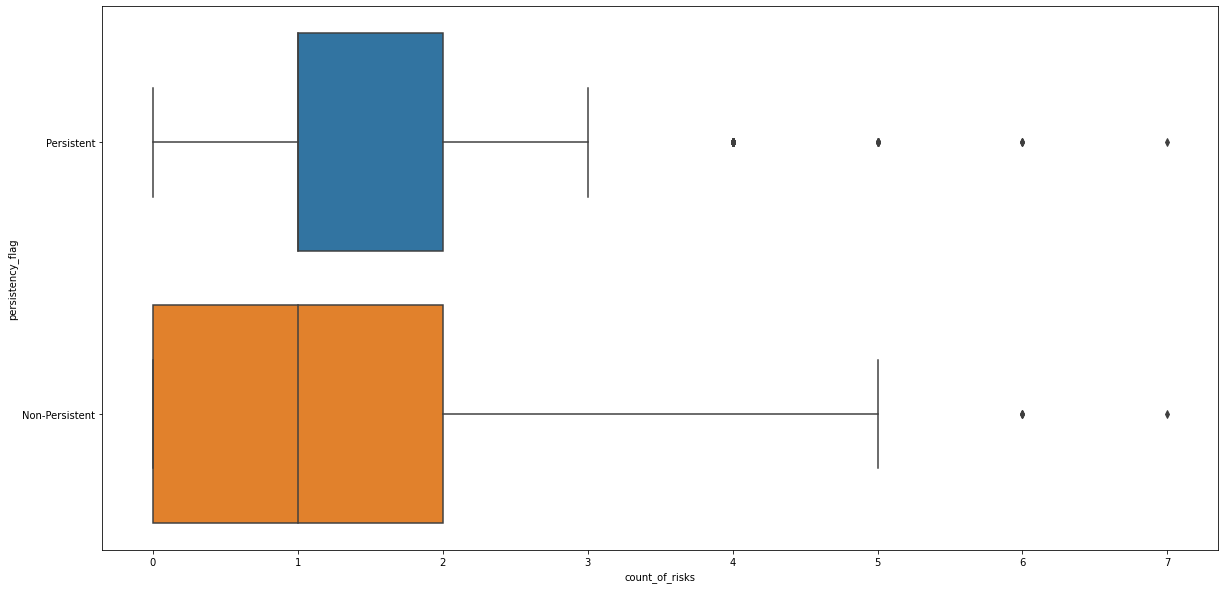

In [16]:
plt.figure(figsize=(20,10))
var ="count_of_risks"
sns.boxplot(x=var,y ="persistency_flag",data=df)

<Figure size 1440x720 with 0 Axes>

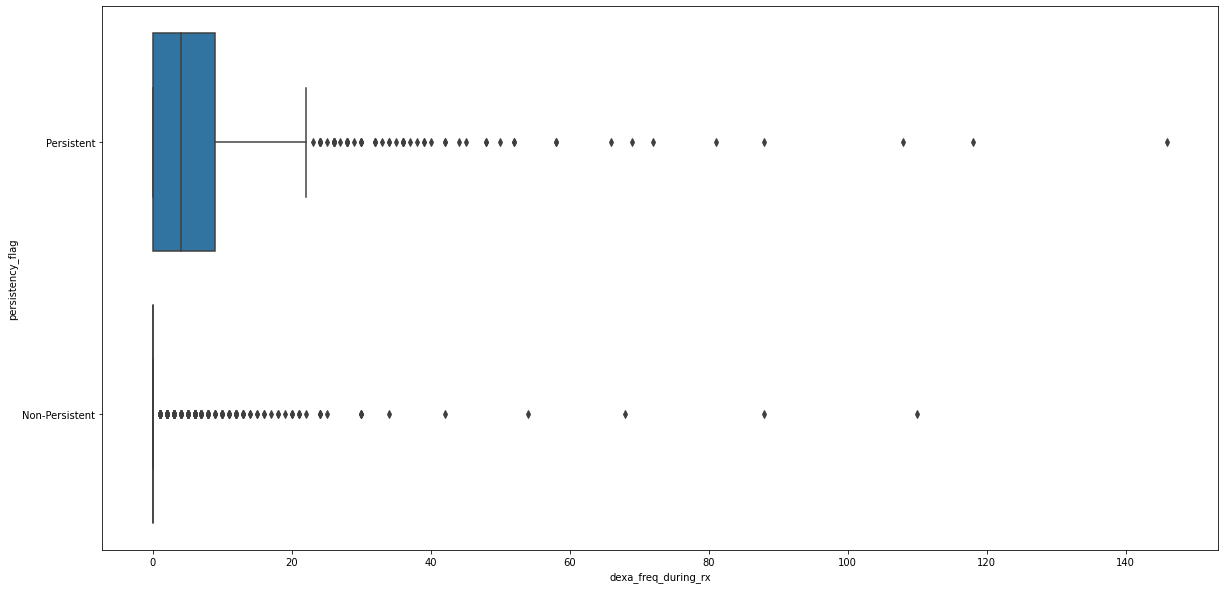

In [17]:
plt.figure(figsize=(20,10))
var ="dexa_freq_during_rx"
sns.boxplot(x=var,y ="persistency_flag",data=df)

In [18]:
print("Count of risks skweness: ",df["count_of_risks"].skew())
print("Count of risks Kurtosis: ",df["count_of_risks"].kurt())

## Data shows a moderate positive skewed data on this column and fairly platykurtic
## Means the data has little outliers

Count of risks skweness:  0.8797905232898707
Count of risks Kurtosis:  0.9004859968892842


In [19]:
print("dexa_freq_during_rx skweness: ",df["dexa_freq_during_rx"].skew())
print("dexa_freq_during_rx Kurtosis: ",df["dexa_freq_during_rx"].kurt())
## very high positive skewed and also with very high kurtosis(Platykurtic)
## This suggests Presence of alot of outliers.

dexa_freq_during_rx skweness:  6.8087302112992285
dexa_freq_during_rx Kurtosis:  74.75837754795428


In [20]:
#standardizing dexa_freq_during_rx df
dexa_scaled = StandardScaler().fit_transform(df['dexa_freq_during_rx'][:,np.newaxis]);
low_range = dexa_scaled[dexa_scaled[:,0].argsort()][:10]
high_range= dexa_scaled[dexa_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]]

outer range (high) of the distribution:
[[ 7.98784109]
 [ 8.11076133]
 [ 8.47952205]
 [ 9.58580421]
 [10.44624589]
 [10.44624589]
 [12.90465068]
 [13.15049116]
 [14.13385307]
 [17.57561978]]


In [21]:
scaler = RobustScaler()
df['dexa_freq_during_rx'] = scaler.fit_transform(df['dexa_freq_during_rx'].values.reshape(-1,1))

In [22]:
scaler = RobustScaler()
df['count_of_risks'] = scaler.fit_transform(df['count_of_risks'].values.reshape(-1,1))

In [23]:
''' Detection '''
# IQR
Q1 = np.percentile(df['dexa_freq_during_rx'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['dexa_freq_during_rx'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['dexa_freq_during_rx'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['dexa_freq_during_rx'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

' Detection '

Old Shape:  (3424, 69)
lower []
Upper [  32   33   62   65   89  101  110  116  164  180  186  194  198  201
  217  241  246  256  264  282  292  303  327  340  349  358  368  369
  373  378  382  390  415  417  426  433  448  457  462  464  480  495
  496  497  505  514  517  541  545  549  563  575  588  589  592  599
  603  605  613  640  646  651  653  656  657  678  684  688  700  705
  710  711  726  728  729  730  759  760  764  765  785  786  804  814
  823  834  847  849  864  870  873  885  909  915  925  926  930  937
  946  978  982  991  994 1006 1008 1016 1042 1061 1073 1074 1076 1113
 1118 1119 1128 1134 1141 1148 1151 1196 1240 1265 1267 1270 1272 1273
 1280 1283 1286 1291 1315 1359 1360 1363 1365 1370 1372 1396 1398 1404
 1448 1474 1513 1524 1533 1539 1546 1550 1554 1555 1564 1566 1570 1576
 1599 1628 1641 1642 1647 1654 1662 1671 1691 1703 1724 1732 1734 1746
 1752 1773 1782 1783 1788 1793 1803 1815 1826 1833 1834 1836 1838 1848
 1852 1854 1870 1876 1895 1901 1904 190

' Removing the Outliers '

New Shape:  (2964, 69)


In [24]:
''' Detection '''
# IQR
Q1 = np.percentile(df['count_of_risks'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['count_of_risks'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['count_of_risks'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['count_of_risks'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape) 

df = df.reset_index(drop=True)

' Detection '

Old Shape:  (2964, 69)
lower []
Upper [ 281  318  327  507  655  665  678  705  733  952 1001 1126 1590 1624
 1836 2227 2234 2450 2611 2702 2755 2888]


' Removing the Outliers '

New Shape:  (2942, 69)


## **Describe Data**

In [25]:
#distribution of categorical features
df.describe(include=['O'])

ptid persistency_flag  gender       race     ethnicity   region  \
count    2942             2942    2942       2942          2942     2942   
unique   2942                2       2          4             3        5   
top     P1352   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest   
freq        1             2047    2769       2701          2784     1210   

       age_bucket        ntm_speciality ntm_specialist_flag  \
count        2942                  2942                2942   
unique          4                    35                   2   
top           >75  GENERAL PRACTITIONER              Others   
freq         1262                  1345                1774   

            ntm_speciality_bucket gluco_record_prior_ntm  \
count                        2942                   2942   
unique                          3                      2   
top     OB/GYN/Others/PCP/Unknown                      N   
freq                         1855                   2241   

       gluco_record_during_rx dexa_during_rx frag_frac_prior_ntm  \
count                    2942           2942                2942   
unique                      2              2                   2   
top                         N              N                   N   
freq                     2205           2474                2496   

       frag_frac_during_rx risk_segment_prior_ntm tscore_bucket_prior_ntm  \
count                 2942                   2942                    2942   
unique                   2                      2                       2   
top                      N                 VLR_LR                   >-2.5   
freq                  2613                   1676                    1690   

       risk_segment_during_rx tscore_bucket_during_rx change_t_score  \
count                    2942                    2942           2942   
unique                      3                       3              4   
top                   Unknown                 Unknown      No change   
freq                     1362                    1362           1387   

       change_risk_segment adherent_flag idn_indicator  \
count                 2942          2942          2942   
unique                   4             2             2   
top                Unknown      Adherent             Y   
freq                  1969          2807          2199   

       injectable_experience_during_rx  \
count                             2942   
unique                               2   
top                                  Y   
freq                              2615   

       comorb_encounter_for_screening_for_malignant_neoplasms  \
count                                                    2942   
unique                                                      2   
top                                                         N   
freq                                                     1765   

       comorb_encounter_for_immunization  \
count                               2942   
unique                                 2   
top                                    N   
freq                                1771   

       comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
count                                                             2942   
unique                                                               2   
top                                                                  N   
freq                                                              1891   

       comorb_vitamin_d_deficiency  \
count                         2942   
unique                           2   
top                              N   
freq                          2055   

       comorb_other_joint_disorder_not_elsewhere_classified  \
count                                                  2942   
unique                                                    2   
top                                                       N   
freq                                                   2146 

In [26]:
df.groupby(['persistency_flag']).mean().T

persistency_flag     Non-Persistent  Persistent
dexa_freq_during_rx        0.085491    0.662570
count_of_risks             0.074744    0.155866

In [27]:
df.groupby(['gender']).mean().T

gender                 Female      Male
dexa_freq_during_rx  0.263874  0.215800
count_of_risks       0.099494  0.098266

In [28]:
df.groupby(['race']).mean()

dexa_freq_during_rx  count_of_risks
race                                                 
African American             0.246377        0.168478
Asian                        0.135266        0.021739
Caucasian                    0.266445        0.098297
Other/Unknown                0.204167        0.125000

In [29]:
df.groupby(['ethnicity']).mean().T

ethnicity            Hispanic  Not Hispanic   Unknown
dexa_freq_during_rx  0.279835      0.260417  0.264069
count_of_risks       0.265432      0.097342  0.000000

In [30]:
df.groupby(['age_bucket']).mean().T

age_bucket              55-65     65-75       <55       >75
dexa_freq_during_rx  0.242229  0.297880  0.273973  0.242208
count_of_risks       0.118167  0.097039  0.089041  0.093106

In [31]:
df.groupby(['ntm_speciality']).mean().T

ntm_speciality       CARDIOLOGY  CLINICAL NURSE SPECIALIST  \
dexa_freq_during_rx    0.285714                        0.0   
count_of_risks         0.380952                       -0.5   

ntm_speciality       EMERGENCY MEDICINE  ENDOCRINOLOGY  GASTROENTEROLOGY  \
dexa_freq_during_rx                 0.0       0.392265               0.0   
count_of_risks                      0.0       0.279006               0.0   

ntm_speciality       GENERAL PRACTITIONER  GERIATRIC MEDICINE  \
dexa_freq_during_rx              0.212887                1.00   
count_of_risks                   0.049442                0.75   

ntm_speciality       HEMATOLOGY & ONCOLOGY  HOSPICE AND PALLIATIVE MEDICINE  \
dexa_freq_during_rx               0.111111                             0.00   
count_of_risks                   -0.041667                            -0.25   

ntm_speciality       HOSPITAL MEDICINE  NEPHROLOGY  NUCLEAR MEDICINE  \
dexa_freq_during_rx                0.0         0.0               0.0   
count_of_risks                    -0.5         0.0               1.0   

ntm_speciality       OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY  \
dexa_freq_during_rx                                                             0.0   
count_of_risks                                                                 -0.5   

ntm_speciality       OBSTETRICS AND GYNECOLOGY  OCCUPATIONAL MEDICINE  \
dexa_freq_during_rx                   0.220833                    0.0   
count_of_risks                        0.000000                    0.0   

ntm_speciality       ONCOLOGY  OPHTHALMOLOGY  ORTHOPEDIC SURGERY  ORTHOPEDICS  \
dexa_freq_during_rx  0.586453            0.0            0.173333         0.00   
count_of_risks      -0.008021           -0.5            0.200000        -0.25   

ntm_speciality       OTOLARYNGOLOGY  PAIN MEDICINE  PATHOLOGY  PEDIATRICS  \
dexa_freq_during_rx        0.358974       0.666667   0.794872    0.037037   
count_of_risks            -0.230769       1.000000   0.307692    0.111111   

ntm_speciality       PHYSICAL MEDICINE AND REHABILITATION  PLASTIC SURGERY  \
dexa_freq_during_rx                              0.000000              0.0   
count_of_risks                                   0.045455             -0.5   

ntm_speciality       PODIATRY  PSYCHIATRY AND NEUROLOGY  PULMONARY MEDICINE  \
dexa_freq_during_rx       0.0                  0.666667            0.428571   
count_of_risks           -0.5                  0.500000            0.714286   

ntm_speciality       RADIOLOGY  RHEUMATOLOGY  \
dexa_freq_during_rx        0.0      0.221349   
count_of_risks             0.0      0.185658   

ntm_speciality       SURGERY AND SURGICAL SPECIALTIES  TRANSPLANT SURGERY  \
dexa_freq_during_rx                            0.2500                 0.0   
count_of_risks                                 0.1875                -0.5   

ntm_speciality        UROLOGY   Unknown  VASCULAR SURGERY  
dexa_freq_during_rx  0.149425  0.207303               0.0  
count_of_risks      -0.034483  0.042403               0.0

In [32]:
df.groupby(['ntm_specialist_flag']).mean().T

ntm_specialist_flag    Others  Specialist
dexa_freq_during_rx  0.215145    0.330765
count_of_risks       0.056370    0.164812

In [33]:
df.groupby(['ntm_speciality_bucket']).mean().T

ntm_speciality_bucket  Endo/Onc/Uro  OB/GYN/Others/PCP/Unknown     Rheum
dexa_freq_during_rx        0.442907                   0.215274  0.221349
count_of_risks             0.170415                   0.053639  0.185658

In [34]:
df.groupby(['ntm_speciality_bucket']).mean().T

ntm_speciality_bucket  Endo/Onc/Uro  OB/GYN/Others/PCP/Unknown     Rheum
dexa_freq_during_rx        0.442907                   0.215274  0.221349
count_of_risks             0.170415                   0.053639  0.185658

In [35]:
df.groupby(['risk_chronic_liver_disease']).mean().T

risk_chronic_liver_disease         N         Y
dexa_freq_during_rx         0.260132  0.452381
count_of_risks              0.096482  0.714286

In [36]:
df.groupby(['risk_family_history_of_osteoporosis']).mean().T

risk_family_history_of_osteoporosis         N         Y
dexa_freq_during_rx                  0.258113  0.287671
count_of_risks                       0.045283  0.590753

In [37]:
df.groupby(['risk_low_calcium_intake']).mean().T

risk_low_calcium_intake         N         Y
dexa_freq_during_rx      0.261069  0.259259
count_of_risks           0.090502  0.819444

In [38]:
df.groupby(['risk_vitamin_d_insufficiency']).mean().T

risk_vitamin_d_insufficiency         N         Y
dexa_freq_during_rx           0.223363  0.303468
count_of_risks               -0.175866  0.409321

In [39]:
df.groupby(['risk_excessive_thinness']).mean().T

risk_excessive_thinness         N         Y
dexa_freq_during_rx      0.261946  0.218579
count_of_risks           0.085908  0.737705

In [40]:
df.groupby(['risk_hysterectomy_oophorectomy']).mean().T

risk_hysterectomy_oophorectomy         N         Y
dexa_freq_during_rx             0.261650  0.222222
count_of_risks                  0.089748  0.722222

In [41]:
df.groupby(['risk_estrogen_deficiency']).mean().T

risk_estrogen_deficiency         N         Y
dexa_freq_during_rx       0.261052  0.259259
count_of_risks            0.097682  0.666667

In [42]:
df.groupby(['risk_immobilization']).mean().T

risk_immobilization         N         Y
dexa_freq_during_rx  0.262002  0.027778
count_of_risks       0.096416  0.833333

In [43]:

df.groupby(['risk_recurring_falls']).mean().T

risk_recurring_falls         N         Y
dexa_freq_during_rx   0.259901  0.321212
count_of_risks        0.087634  0.718182

# **Data Wrangling , Transformation and Standardization**

In [44]:
df = df.drop(['ptid'], axis=1)

In [45]:
mapper = {'N': 0, 'Y':1}
df = df.replace(mapper)

In [46]:
df['persistency_flag'] = df['persistency_flag'].replace(['Non-Persistent', 'Persistent'],[0, 1])
df.head()

persistency_flag  gender           race     ethnicity   region age_bucket  \
0                 1    Male      Caucasian  Not Hispanic     West        >75   
1                 0    Male          Asian  Not Hispanic     West      55-65   
2                 0  Female  Other/Unknown      Hispanic  Midwest      65-75   
3                 0  Female      Caucasian  Not Hispanic  Midwest        >75   
4                 0  Female      Caucasian  Not Hispanic  Midwest        >75   

         ntm_speciality ntm_specialist_flag      ntm_speciality_bucket  \
0  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
1  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
2  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
3  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
4  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   

   gluco_record_prior_ntm  gluco_record_during_rx  dexa_freq_during_rx  \
0                       0                       0                  0.0   
1                       0                       0                  0.0   
2                       0                       0                  0.0   
3                       0                       1                  0.0   
4                       1                       1                  0.0   

   dexa_during_rx  frag_frac_prior_ntm  frag_frac_during_rx  \
0               0                    0                    0   
1               0                    0                    0   
2               0                    0                    0   
3               0                    0                    0   
4               0                    0                    0   

  risk_segment_prior_ntm tscore_bucket_prior_ntm risk_segment_during_rx  \
0                 VLR_LR                   >-2.5                 VLR_LR   
1                 VLR_LR                   >-2.5                Unknown   
2                 HR_VHR                  <=-2.5                 HR_VHR   
3                 HR_VHR                   >-2.5                 HR_VHR   
4                 HR_VHR                  <=-2.5                Unknown   

  tscore_bucket_during_rx change_t_score change_risk_segment adherent_flag  \
0                  <=-2.5      No change             Unknown      Adherent   
1                 Unknown        Unknown             Unknown      Adherent   
2                  <=-2.5      No change           No change      Adherent   
3                  <=-2.5      No change           No change      Adherent   
4                 Unknown        Unknown             Unknown      Adherent   

   idn_indicator  injectable_experience_during_rx  \
0              0                                1   
1              0                                1   
2              0                                1   
3              0                                1   
4              0                                1   

   comorb_encounter_for_screening_for_malignant_neoplasms  \
0                                                       0   
1                                                       0   
2                                                       1   
3                                                       0   
4                                                       1   

   comorb_encounter_for_immunization  \
0                                  1   
1                                  0   
2                                  0   
3                                  1   
4                                  1   

   comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
0                                                                1   
1                                                                1   
2                                                                1   
3                                                                1   
4                                                       

### **Analyzing dependency of variable (After Transformation)**

In [59]:
np.abs(df.corr()).sort_values(by=['persistency_flag'], ascending=False)

persistency_flag  \
persistency_flag                                                            1.000000   
dexa_freq_during_rx                                                         0.414876   
dexa_during_rx                                                              0.374966   
comorb_long_term_current_drug_therapy                                       0.342776   
comorb_encounter_for_screening_for_malignant_neoplasms                      0.268339   
comorb_encounter_for_immunization                                           0.268305   
comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx             0.257895   
concom_systemic_corticosteroids_plain                                       0.249048   
concom_viral_vaccines                                                       0.227004   
comorb_other_disorders_of_bone_density_and_structure                        0.227003   
concom_anaesthetics_general                                                 0.220619   
concom_cephalosporins                                                       0.217821   
comorb_other_joint_disorder_not_elsewhere_classified                        0.215937   
gluco_record_during_rx                                                      0.212778   
comorb_gastro_esophageal_reflux_disease                                     0.207985   
concom_macrolides_and_similar_types                                         0.192350   
comorb_personal_history_of_other_diseases_and_conditions                    0.189565   
concom_narcotics                                                            0.188391   
concom_broad_spectrum_penicillins                                           0.186610   
concom_fluoroquinolones                                                     0.181213   
comorb_dorsalgia                                                            0.179925   
comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx          0.164096   
comorb_personal_history_of_malignant_neoplasm                               0.157273   
comorb_vitamin_d_deficiency                                                 0.151592   
comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias             0.147411   
comorb_osteoporosis_without_current_pathological_fracture                   0.132641   
idn_indicator                                                               0.125887   
concom_cholesterol_and_triglyceride_regulating_preparations                 0.125322   
risk_smoking_tobacco                                                        0.115573   
concom_anti_depressants_and_mood_stabilisers                                0.111728   
frag_frac_during_rx                                                         0.102944   
injectable_experience_during_rx                                             0.097495   
count_of_risks                                                              0.071565   
risk_vitamin_d_insufficiency                                                0.069520   
risk_rheumatoid_arthritis                                                   0.059501   
risk_poor_health_frailty                                                    0.055891   
risk_untreated_chronic_hypogonadism                                         0.045216   
risk_immobilization                                                         0.042316   
risk_chronic_malnutrition_or_malabsorption                                  0.031632   
risk_chronic_liver_disease                                                  0.029426   
risk_excessive_thinness                                                     0.023628   
risk_estrogen_deficiency                                                    0.023250   
risk_recurring_falls                                                        0.020356   
risk_untreated_chronic_hyperthyroidism                                      0.017246   
risk_family_history_of_osteoporosis                                         0.016878   
risk_hysterectomy_oo

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f26583b20d0>)

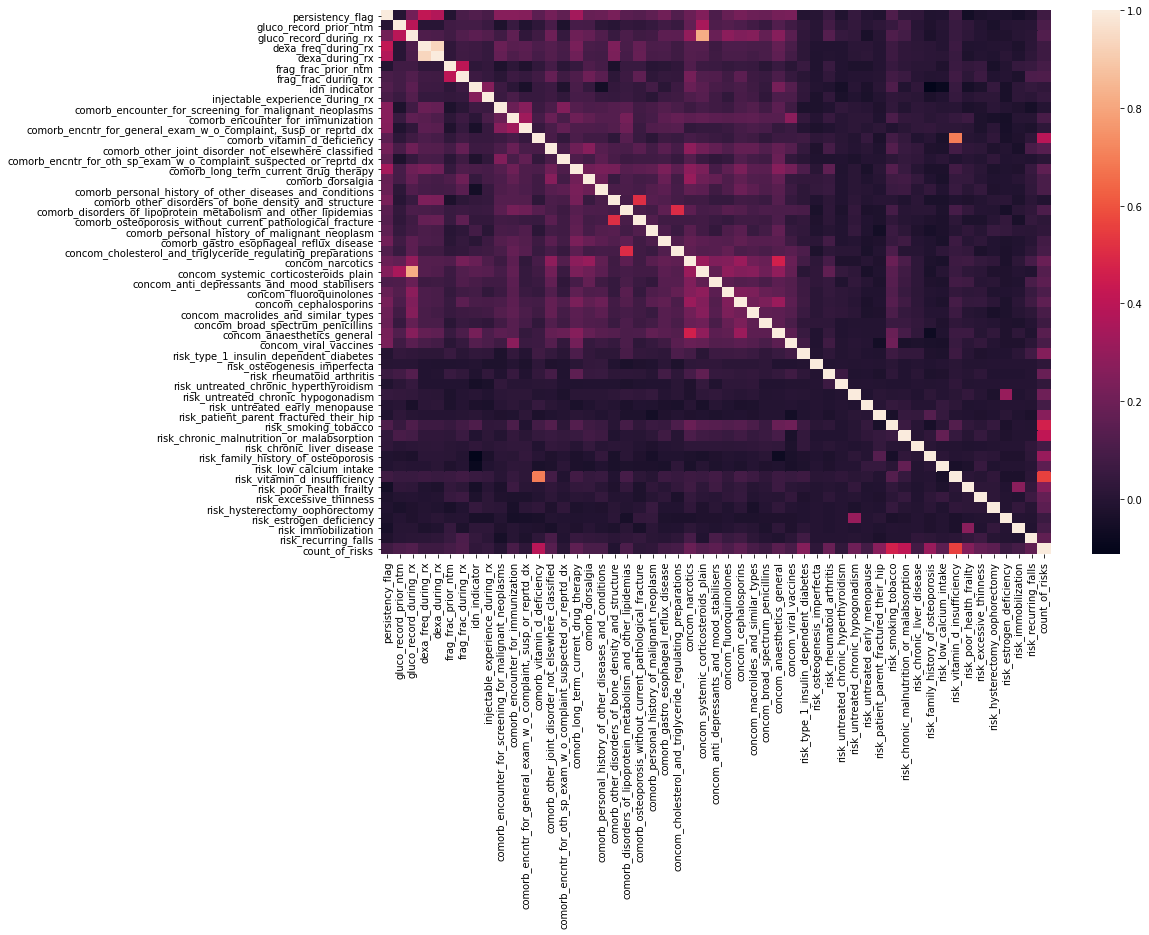

In [64]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr())

### *Creating Dummy values*

In [47]:
X=df.drop(['persistency_flag'],axis=1)
y=df['persistency_flag']

X = pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [48]:
df_train = X_train.copy()
df_train['persistency_flag'] = y_train
df_train.head()

gluco_record_prior_ntm  gluco_record_during_rx  dexa_freq_during_rx  \
462                        0                       0             0.000000   
2176                       0                       0             0.000000   
2671                       0                       0             0.000000   
381                        0                       1             0.000000   
847                        0                       0             0.666667   

      dexa_during_rx  frag_frac_prior_ntm  frag_frac_during_rx  idn_indicator  \
462                0                    1                    0              0   
2176               0                    0                    0              1   
2671               0                    0                    0              1   
381                0                    0                    0              1   
847                1                    0                    0              1   

      injectable_experience_during_rx  \
462                                 1   
2176                                1   
2671                                1   
381                                 1   
847                                 1   

      comorb_encounter_for_screening_for_malignant_neoplasms  \
462                                                        1   
2176                                                       0   
2671                                                       0   
381                                                        1   
847                                                        1   

      comorb_encounter_for_immunization  \
462                                   1   
2176                                  0   
2671                                  1   
381                                   0   
847                                   1   

      comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx  \
462                                                                 1   
2176                                                                0   
2671                                                                0   
381                                                                 0   
847                                                                 0   

      comorb_vitamin_d_deficiency  \
462                             1   
2176                            1   
2671                            0   
381                             1   
847                             0   

      comorb_other_joint_disorder_not_elsewhere_classified  \
462                                                      1   
2176                                                     0   
2671                                                     0   
381                                                      0   
847                                                      1   

      comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx  \
462                                                                    0   
2176                                                                   0   
2671                                                                   0   
381                                                                    1   
847                                                                    0   

      comorb_long_term_current_drug_therapy  comorb_dorsalgia  \
462                                       0                 0   
2176                                      0                 0   
2671                                      0                 0   
381                                       0                 0   
847                                       0                 0   

      comorb_personal_history_of_other_diseases_and_conditions  \
462                                                          1   
2176                                                         0   
2671                                                         0   
381               

### *Come Imbalanced dataset*

In [49]:
classes=df_train['persistency_flag'].value_counts()
normal_share=round(classes[0]/df_train['persistency_flag'].count()*100,2)
fraud_share=round(classes[1]/df_train['persistency_flag'].count()*100, 2)
print("Non-Persistent : {} %".format(normal_share))
print("Persistent : {} %".format(fraud_share))

Non-Persistent : 69.7 %
Persistent : 30.3 %


In [50]:
fig = px.histogram(df_train, x="persistency_flag", color="persistency_flag", title="Persistent class histogram")
fig.show()

### *Upsampling*

In [51]:
# Upsampling
df_minority_upsampled = resample(df_train[df_train['persistency_flag'] == 1], 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_train[df_train['persistency_flag'] == 0]),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_train = pd.concat([df_train[df_train['persistency_flag'] == 0], df_minority_upsampled])
 
# Display new class counts
df_train.persistency_flag.value_counts()

1    1640
0    1640
Name: persistency_flag, dtype: int64

In [52]:
X_train=df_train.drop(['persistency_flag'],axis=1)
y_train=df_train['persistency_flag']

In [53]:
fig = px.histogram(df_train, x="persistency_flag", color="persistency_flag", title="Persistent class histogram")
fig.show()

# **Model Creation**